#CafChem Teaching - Basic RDKit

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChemTeach/blob/main/notebooks/RDKit_intro_CafChem.ipynb)

## This notebook allows you to:
- Explore some functionality of the RDKit library.

## Requirements:
- If using on Colab, install rdkit
- Can run on a CPU
- will run in your anaconda environment

## Install and import
- Install rdkit
- import the needed modules from rdkit

In [ ]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 48.1 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, Recap

## SMILES, working with mol objects
- First, enter a SMILES and convert it to a *mol* object.
- Extract some info from the mol, draw the molecule

In [ ]:
test_smiles = 'c1ccc(F)cc1'

In [ ]:
mol = Chem.MolFromSmiles(test_smiles)
num_atoms = mol.GetNumAtoms()
print(f"The number of atoms is {num_atoms}")

The number of atoms is 7


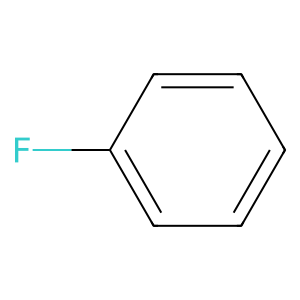

In [ ]:
Draw.MolToImage(mol)

### 3D
- add protons to the molecule and optimize the 3D structure with the Universal Force Field

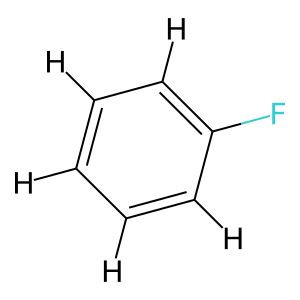

In [ ]:
mol_w_h = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol_w_h)
AllChem.UFFOptimizeMolecule(mol_w_h)
Draw.MolToImage(mol_w_h)

### Save the 3D structure as an XYZ file
- these files are readable by most computational chemistry apps

In [ ]:
file_text = Chem.MolToXYZBlock(mol_w_h)
print(file_text)

12

C     -1.371845   -0.372563   -0.015898
C     -1.014289    0.979919   -0.016783
C      0.335698    1.346766   -0.001134
C      1.328660    0.360835    0.015407
F      2.636975    0.716145    0.030596
C      0.970651   -0.991991    0.016269
C     -0.379447   -1.358427    0.000618
H     -2.416286   -0.656210   -0.027993
H     -1.782167    1.742588   -0.029573
H      0.610837    2.393625   -0.001836
H      1.737399   -1.755896    0.029039
H     -0.656187   -2.404792    0.001289



In [ ]:
f = open("test.xyz", "w")
f.write(file_text)
f.close()

### Working with molecule properties
- use *mol*.GetAtoms() to iterate over the atoms in a molecule
- use *atom*.GetIdx() to get the index of the atom in question
- use *atom*.IsInRing() to see if an atom is in a ring
- use *atom*.GetSymbol() to get the atomic symbol
- use *mol*.GetConformer().GetAtomPosition() to get the XYZ coordinates of a single atom in a molecule


In [ ]:
for atoms in mol_w_h.GetAtoms():
    ring_status = mol_w_h.GetAtomWithIdx(atoms.GetIdx()).IsInRing()
    symbol = atoms.GetSymbol()
    positions = mol_w_h.GetConformer().GetAtomPosition(atoms.GetIdx())
    print(f"{symbol:5} {positions.x:10.3f}, {positions.y:10.3f}, {positions.z:10.3f}, In ring? {ring_status}")

C         -1.372,     -0.373,     -0.016, In ring? True
C         -1.014,      0.980,     -0.017, In ring? True
C          0.336,      1.347,     -0.001, In ring? True
C          1.329,      0.361,      0.015, In ring? True
F          2.637,      0.716,      0.031, In ring? False
C          0.971,     -0.992,      0.016, In ring? True
C         -0.379,     -1.358,      0.001, In ring? True
H         -2.416,     -0.656,     -0.028, In ring? False
H         -1.782,      1.743,     -0.030, In ring? False
H          0.611,      2.394,     -0.002, In ring? False
H          1.737,     -1.756,      0.029, In ring? False
H         -0.656,     -2.405,      0.001, In ring? False


## Working with lists of Molecules

### Aligning and printing multiple molecules
- define a template fragment common to all of your molecules
- use AllChem.Compute2DCoords(*mol*) to calculate positions for each atom in the template fragment and in each molecule in the list
- use AllChem.GenerateDepictionMatching2DStructure(*mol*, *template*) to align all the list molecules based on the template
- Draw all the molecules with a legend for each

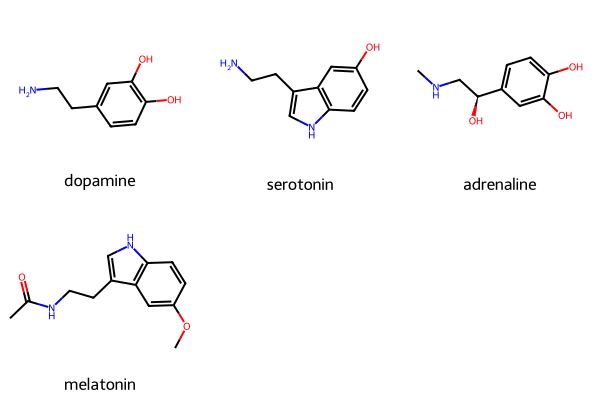

In [ ]:
neurotransmitters = ['NCCc1cc(O)c(O)cc1', 'C1=CC2=C(C=C1O)C(=CN2)CCN', 'CNC[C@H](O)c1ccc(O)c(O)c1', 'CC(=O)NCCC1=CNC2=C1C=C(C=C2)OC']
nt_names = ['dopamine', 'serotonin', 'adrenaline', 'melatonin']

nt_mols = [Chem.MolFromSmiles(x) for x in neurotransmitters]

Draw.MolsToGridImage(nt_mols, legends=nt_names)

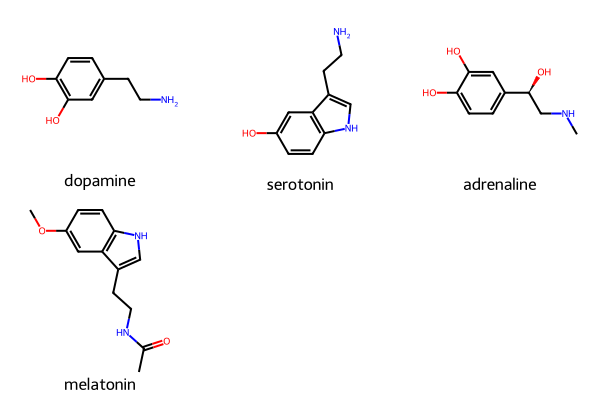

In [ ]:
template = Chem.MolFromSmiles('c1ccc(O)cc1')
AllChem.Compute2DCoords(template)

for i in range(len(nt_mols)):
  AllChem.Compute2DCoords(nt_mols[i])
  AllChem.GenerateDepictionMatching2DStructure(nt_mols[i], template)

Draw.MolsToGridImage(nt_mols, legends=nt_names)


### Exploring and manipulating molecules
- use *mol1*.HasSubstructMatch(*mol2*) to find if mol2 appears in mol1. Returns True or False
- Save these to a list

In [ ]:
substruct = Chem.MolFromSmiles('CO')

matches = []
for mol,name in zip(nt_mols,nt_names):
  substruct_match = mol.HasSubstructMatch(substruct)
  matches.append(substruct_match)
  print(f"Does {name} contain a match for the substructure? {substruct_match}")

Does dopamine contain a match for the substructure? True
Does serotonin contain a match for the substructure? True
Does adrenaline contain a match for the substructure? True
Does melatonin contain a match for the substructure? True


### Replace fragments
- define a replacement mol object.
- use Chem.ReplaceSubstructs(*mol1*, *mol2*, *mol3*) to look for mol2 in mol1 and replace it with mol3. Returns a list of all possible substitutions.
- View all modified molecules

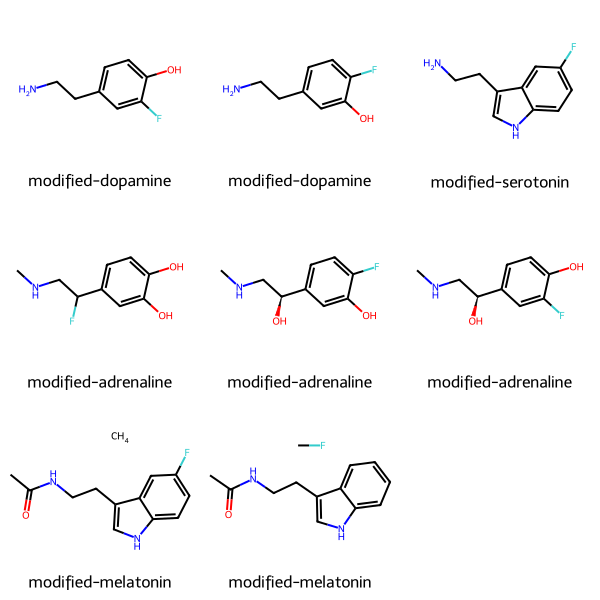

In [ ]:
replacement = Chem.MolFromSmiles('CF')

new_mols = []
new_legends = []

for i, mol in enumerate(nt_mols):
  if matches[i]:
    mol_list = Chem.ReplaceSubstructs(mol, substruct, replacement)
    for mol in mol_list:
      string_temp = Chem.MolToSmiles(mol)
      mol = Chem.MolFromSmiles(string_temp)
      new_mols.append(mol)
      new_legends.append(f'modified-{nt_names[i]}')
  else:
    new_mols.append(mol)
    new_legends.append(nt_names[i])

Draw.MolsToGridImage(new_mols, legends=new_legends)

### Delete a fragment
- define a fragment to delete
- use *mol1*.HasSubstructMatch(*mol2*) to find if mol2 appears in mol1. Save the resulting True or False values to a list
- if there is a match, use Chem.DeleteSubstructs(*mol1*, *mol2*) to delete mol2 from mol1.
- View the resulting molecules

Does dopamine contain a match for the substructure? True
Does serotonin contain a match for the substructure? True
Does adrenaline contain a match for the substructure? True
Does melatonin contain a match for the substructure? True


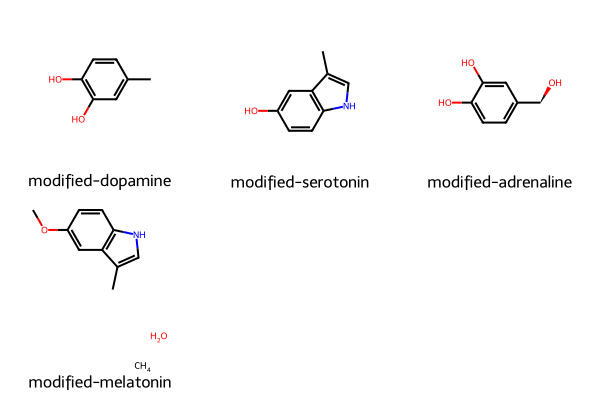

In [ ]:
substruct = Chem.MolFromSmiles('CN')

matches = []
for mol,name in zip(nt_mols,nt_names):
  substruct_match = mol.HasSubstructMatch(substruct)
  matches.append(substruct_match)
  print(f"Does {name} contain a match for the substructure? {substruct_match}")

deletion = Chem.MolFromSmiles('CN')

new_mols = []
new_legends = []

for i, mol in enumerate(nt_mols):
  if matches[i]:
    mol_temp = Chem.DeleteSubstructs(mol, deletion)

    new_mols.append(mol_temp)
    new_legends.append(f'modified-{nt_names[i]}')
  else:
    new_mols.append(mol)
    new_legends.append(nt_names[i])

Draw.MolsToGridImage(new_mols, legends=new_legends)

## Molecular Descriptors
- Find the list of all descriptors available and define a few of interest

In [ ]:
desc_list_raw = Descriptors._descList
desc_list = []
for desc in desc_list_raw:
  desc_list.append(desc[0])

In [ ]:
props = ['qed', 'MolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MolLogP', 'RingCount']

### Calculate the selected descriptors for each molecule
- calculates all descriptors
- prints only those indicated in the props list

In [ ]:
for mol,name in zip(nt_mols,nt_names):
  desc_dict = Descriptors.CalcMolDescriptors(mol)
  print(f"The properties of {name} are:")
  for prop in props:
    print(f"{prop}: {desc_dict[prop]}")
  print('\n')

The properties of dopamine are:
qed: 0.544872838506118
MolWt: 153.18099999999998
NumValenceElectrons: 60
NumRadicalElectrons: 0
MaxPartialCharge: 0.15716301740946287
MolLogP: 0.5989999999999998
RingCount: 1


The properties of serotonin are:
qed: 0.6468452624532928
MolWt: 176.21899999999994
NumValenceElectrons: 68
NumRadicalElectrons: 0
MaxPartialCharge: 0.11583814000409359
MolLogP: 1.3747
RingCount: 2


The properties of adrenaline are:
qed: 0.5101568892419974
MolWt: 183.207
NumValenceElectrons: 72
NumRadicalElectrons: 0
MaxPartialCharge: 0.15726145596040403
MolLogP: 0.35060000000000013
RingCount: 1


The properties of melatonin are:
qed: 0.8449349532973587
MolWt: 232.283
NumValenceElectrons: 90
NumRadicalElectrons: 0
MaxPartialCharge: 0.21638288980463502
MolLogP: 1.8551
RingCount: 2




## Break a molecule into fragments
- use Recap.RecapDecompose(*mol*) to break down a molecule into fragments.
- use .children.keys() to select the first generation of fragments
- use .GetLeaves().keys() to select the last generation of fragments

In [153]:
anx_mol = Chem.MolFromSmiles('Clc4cccc(N3CCN(CCCN1/N=C2/C=C\C=C/N2C1=O)CC3)c4')
anx = Draw.MolToImage(anx_mol)

hier = Recap.RecapDecompose(anx_mol)
children = hier.children.keys()
leaves = hier.GetLeaves().keys()
children = list(children)
leaves = list(leaves)

child_mols = []
leaf_mols = []
for child, leaf in zip(children,leaves):
  mol = Chem.MolFromSmiles(child)
  child_mols.append(mol)
  mol = Chem.MolFromSmiles(leaf)
  leaf_mols.append(mol)

children_img = Draw.MolsToGridImage(child_mols, legends=children)
leaves_img = Draw.MolsToGridImage(leaf_mols, legends=leaves)

### View all the images

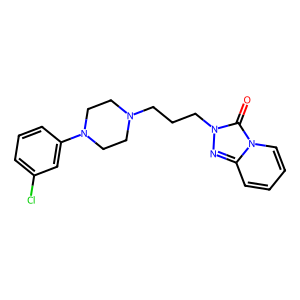

In [154]:
anx

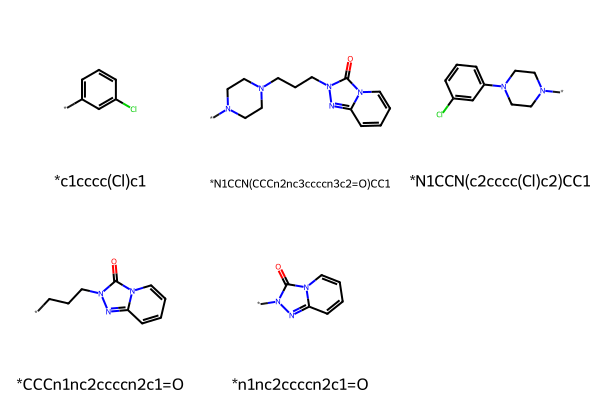

In [155]:
children_img

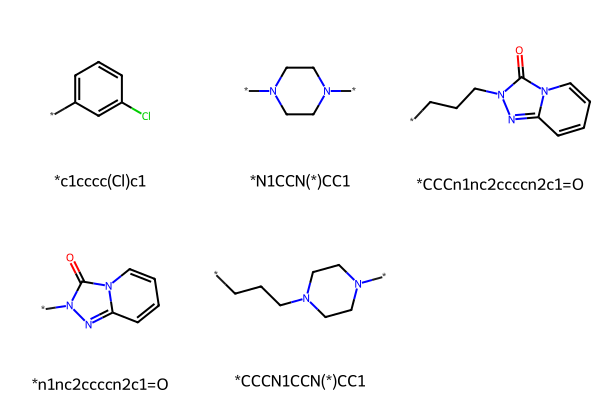

In [156]:
leaves_img